---

# **Análise de Dados** | Credit risk
Por [Aderbal Wallisson](https://www.linkedin.com/in/aderbal-wallisson/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Exploração de dados;</li>
  <li>Transformação e limpeza de dados;</li>
  <li>Visualização de dados;</li>
  <li>Storytelling.</li>
</ol>


---

# **Aulas**

## 1\. Introdução

[Kaggle](https://www.kaggle.com/) é a maior comunidade online de ciência de dados e aprendizado de máquina. A plataforma permite que usuários encontrem e publiquem conjuntos de **dados**, construam e compartilhem **notebooks** (como este do Google Colab) e participem de **competições** (que pagam muito dinheiro as vezes) e desafios de dados. 

> Vamos publicar nosso notebook de exercícios na plataforma web do Kaggle para que você possa compartilhar tudo o que você aprendeu neste curso e compor o seu portfólio.

## 2\. Exploração de Dados

Os dados de crédito que serão explorados estão presentes neste neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, o  interesse é explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

> O atributo de interesse (`default`) é conhecido como **variável resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são conhecidas como **variáveis explicatívas**, **variáveis independentes** ou até **variáveis preditoras**.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

In [3]:
# Lendo o dataset
df = pd.read_csv('/kaggle/input/credita-dataset/credit_dataset.csv', na_values='na')

In [4]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


### **2.1. Estrutura** 

In [5]:
# Conhecendo a quantidade de linhas e colunas do df
print('O tamanho do dataset é:', df.shape)

O tamanho do dataset é: (10127, 16)


In [6]:
# Proporção de dados de clientes adimplentes e inadimplentes 
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [7]:
print('Quantidade de clientes ativos, adimplentes e inadimplestes')
print((f"A quantidade total de clientes é de {round(qtd_total, 2)}"))
print((f"A quantidade total de clientes adimplentes é de {round(qtd_adimplentes, 2)}"))
print((f"A quantidade total de clientes inadimplentes é de {round(qtd_inadimplentes, 2)}"))
print("")
print('Proporção de clientes adimplentes e inadimplestes')
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

Quantidade de clientes ativos, adimplentes e inadimplestes
A quantidade total de clientes é de 10127
A quantidade total de clientes adimplentes é de 8500
A quantidade total de clientes inadimplentes é de 1627

Proporção de clientes adimplentes e inadimplestes
A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


### **2.2. Schema** 

In [8]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


 - Colunas e seus respectivos tipos de dados.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

 - Atributos **categóricos**.

In [10]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 - Atributos **numéricos**.

In [11]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **2.3. Dados faltantes** 

In [12]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Verificando quais colunas possuem dados faltantes.

In [13]:
df['Freq'] = df.groupby('id')['id'].transform('count')
df['Freq']


0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    1
10124    1
10125    1
10126    1
Name: Freq, Length: 10127, dtype: int64

In [14]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
Freq                       False
dtype: bool

 - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [15]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

 * Dados faltantes dos **clientes ativos**

In [16]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


 * Dados faltantes dos **clientes adimplentes**

In [17]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


 * Dados faltantes dos **clientes inadimplentes**

In [18]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 3\. Transformação e limpeza de dados

### **3.1. Correção de schema** 

Convertendo as colunas **limite_credito** e **valor_transacoes_12m** que estão sendo interpretadas como colunas categóricas (`dtype = object`).

In [19]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [20]:
df[['limite_credito', 'valor_transacoes_12m']].head(5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [21]:
# Aplicando função lambda para converter os valores das colunas em float
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

In [22]:
# Verificando o tipo das colunas
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

### **3.2. Remoção de dados faltantes** 

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(7081, 17)

Cálculo da proporção de dados de clientes adimplentes e inadimplentes sem dados faltantes


In [25]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [26]:
print('Quantidade de clientes adimplentes com e sem valores nulos')
print((f"A quantidade total de clientes adimplentes ativos é de {round(qtd_adimplentes, 2)}"))
print((f"A nova quantidade total de clientes adimplentes é de {round(qtd_adimplentes_novo, 2)}"))
print("")
print('Quantidade de clientes inadimplentes com e sem valores nulos')
print((f"A quantidade total de clientes inadimplentes ativos é de {round(qtd_inadimplentes, 2)}"))
print((f"A nova quantidade total de clientes inadimplentes é de {round(qtd_inadimplentes_novo, 2)}"))

Quantidade de clientes adimplentes com e sem valores nulos
A quantidade total de clientes adimplentes ativos é de 8500
A nova quantidade total de clientes adimplentes é de 5968

Quantidade de clientes inadimplentes com e sem valores nulos
A quantidade total de clientes inadimplentes ativos é de 1627
A nova quantidade total de clientes inadimplentes é de 1113


In [27]:
print('Proporcional de clientes adimplentes com e sem valores nulos')
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print('Proporcional de clientes inadimplentes com e sem valores nulos')
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

Proporcional de clientes adimplentes com e sem valores nulos
A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

Proporcional de clientes inadimplentes com e sem valores nulos
A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


## 4\. Visualização de dados

In [28]:
# Função para criar histograma das colunas categóricas
def hist_object(df, df_adimplente, df_inadimplente, coluna, titulos, rotation):
    
    eixo = 0
    max_y = 0
    max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

    for dataframe in [df, df_adimplente, df_inadimplente]:

        df_to_plot = dataframe[coluna].value_counts().to_frame()
        df_to_plot.rename(columns={'count': 'frequencia_absoluta'}, inplace=True)
        df_to_plot.sort_values(by=[coluna], inplace=True)
        df_to_plot.sort_values(by=[coluna])
        df_to_plot.reset_index(inplace=True)

        f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
        f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequencia Absoluta')
        f.set_xticklabels(labels=f.get_xticklabels(), rotation=rotation)

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))
        eixo += 1

    figura.show()

# Função para crar histograma das colunas numéricas
def hist_numeric(df, df_adimplente, df_inadimplente, coluna, titulos):

    eixo = 0
    max_y = 0
    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

    for dataframe in [df, df_adimplente, df_inadimplente]:

      f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
      f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

      _, max_y_f = f.get_ylim()
      max_y = max_y_f if max_y_f > max_y else max_y
      f.set(ylim=(0, max_y))

      eixo += 1

    figura.show()

In [29]:
df_adimplente = df[df['default'] == 0]

In [30]:
df_inadimplente = df[df['default'] == 1]

### **4.1. Visualizações categóricas** 

In [31]:
df.select_dtypes('object').head(5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


 - Escolaridade

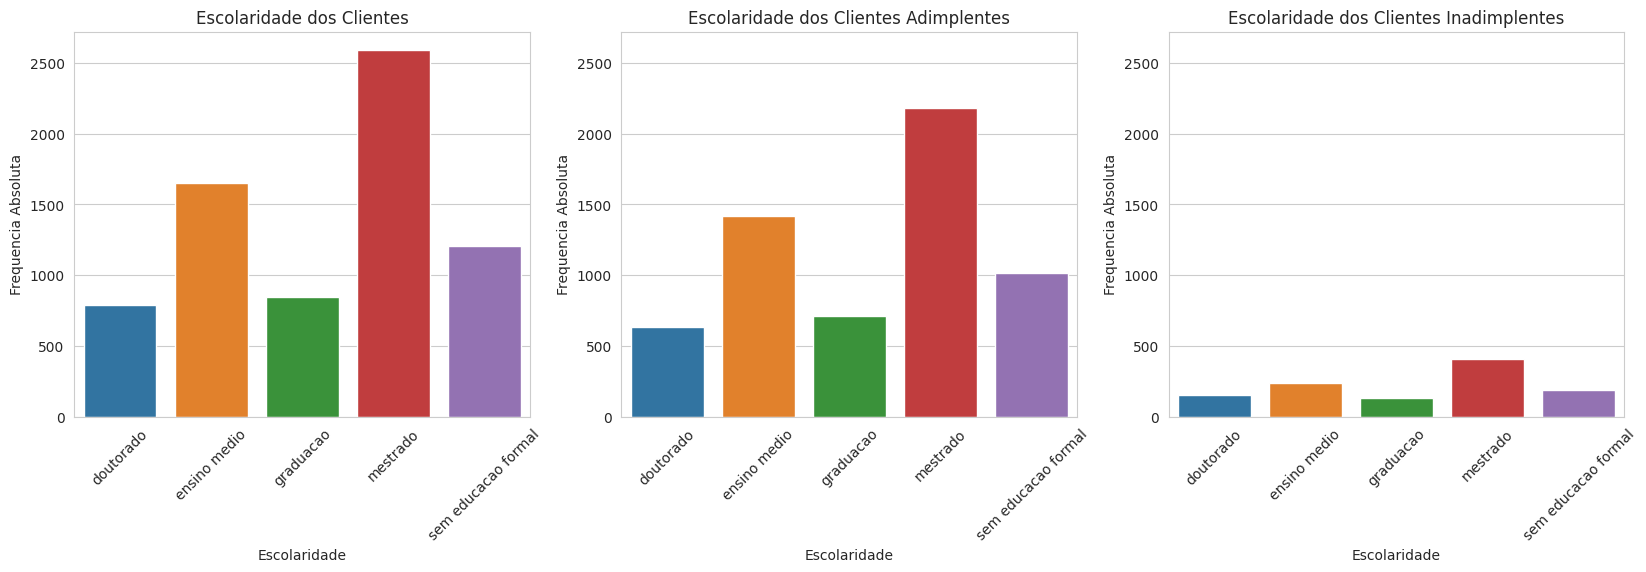

In [32]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

hist_object(df, df_adimplente, df_inadimplente, coluna, titulos, 45)

 - Salário Anual

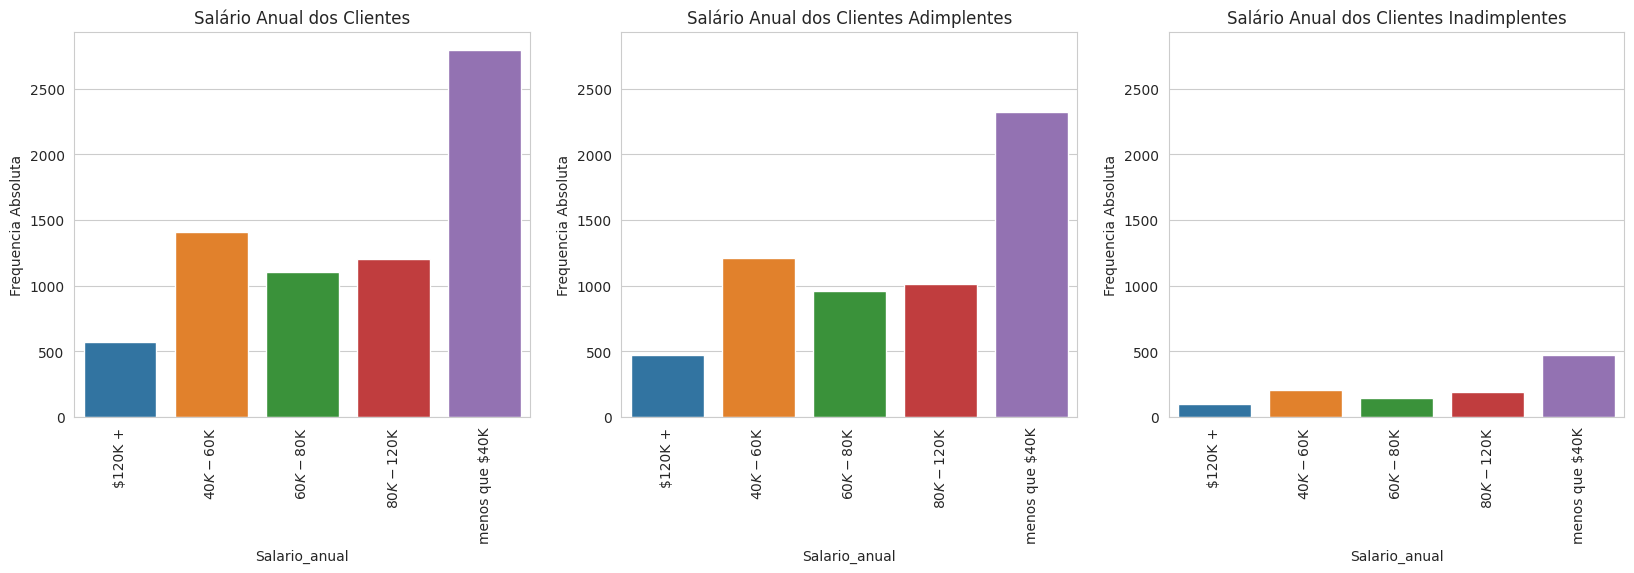

In [33]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

hist_object(df, df_adimplente, df_inadimplente, coluna, titulos, 90)

 * Estado Civil

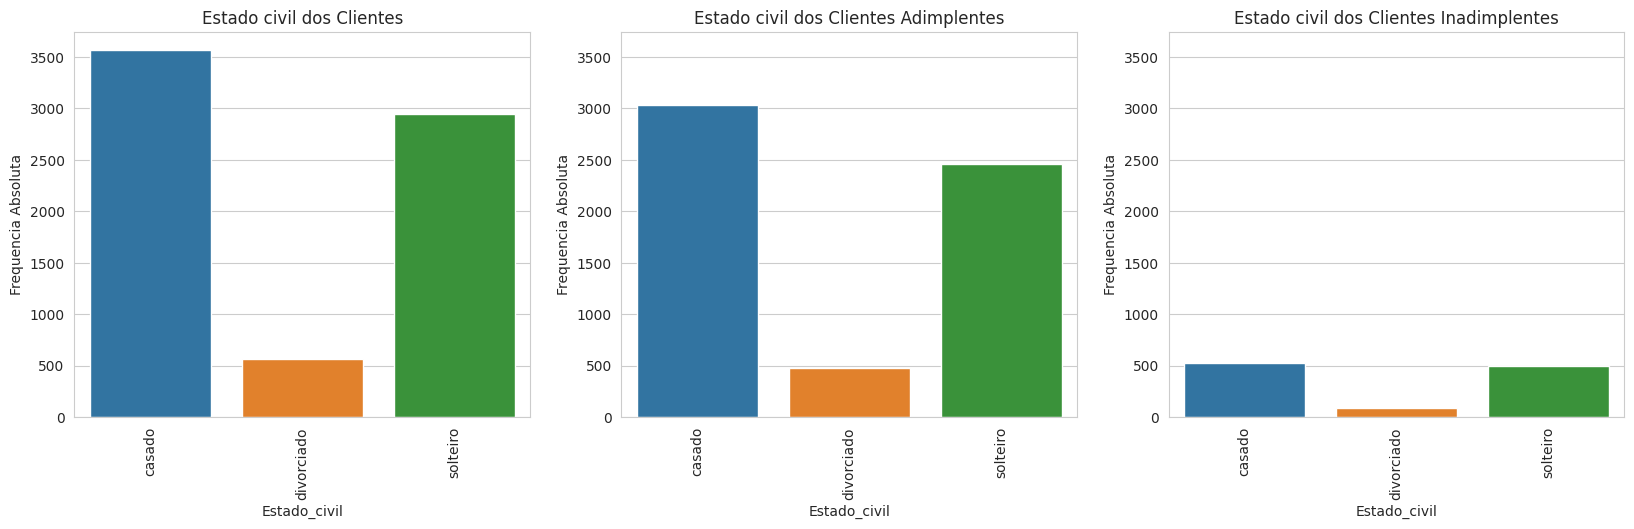

In [34]:
coluna = 'estado_civil'
titulos = ['Estado civil dos Clientes', 'Estado civil dos Clientes Adimplentes', 'Estado civil dos Clientes Inadimplentes']

hist_object(df, df_adimplente, df_inadimplente, coluna, titulos, 90)

### **4.2. Visualizações numéricas** 

Vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [35]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m,Freq
0,45,3,39,5,3,1,12691.51,1144.90,42,1
1,49,5,44,6,2,1,8256.96,1291.45,33,1
2,51,3,36,4,0,1,3418.56,1887.72,20,1
4,40,3,21,5,0,1,4716.22,816.08,28,1
5,44,2,36,3,2,1,4010.69,1088.07,24,1


 - Quantidade de Transações nos Últimos 12 Meses

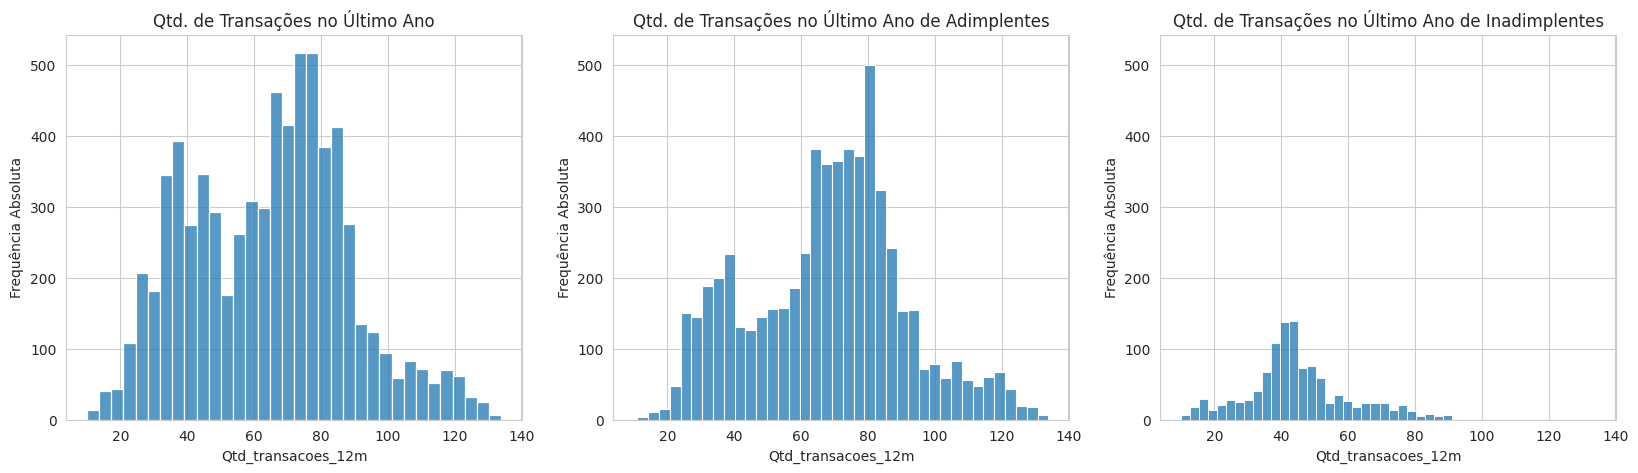

In [36]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

hist_numeric(df, df_adimplente, df_inadimplente, coluna, titulos)

 - Valor das Transações nos Últimos 12 Meses

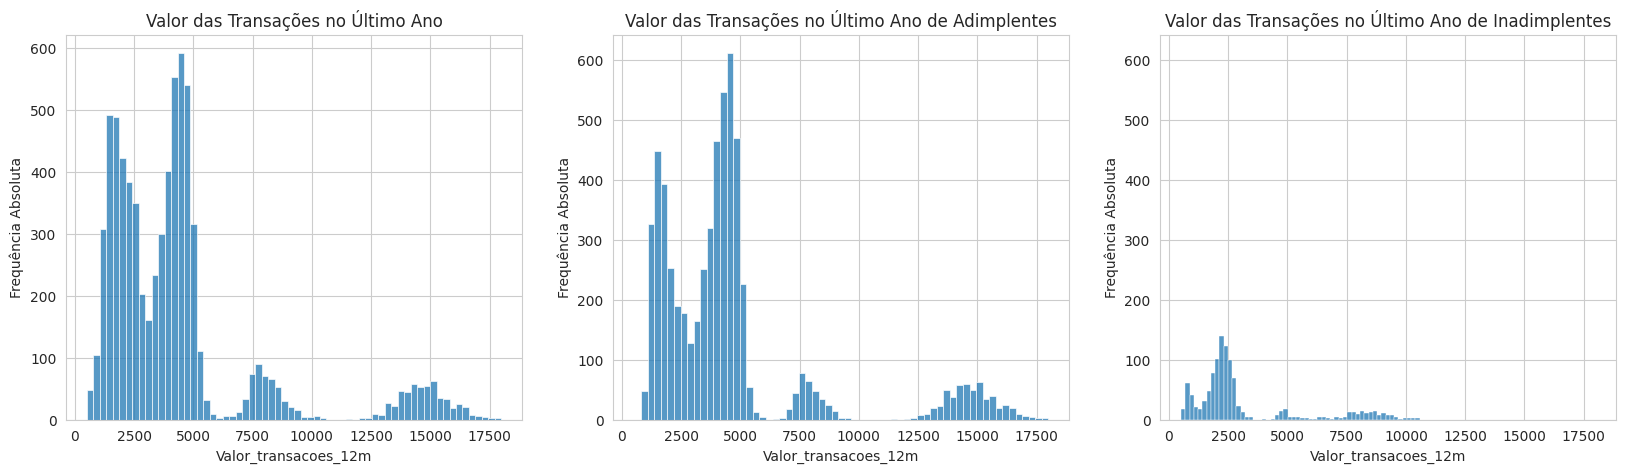

In [37]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

hist_numeric(df, df_adimplente, df_inadimplente, coluna, titulos)

 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

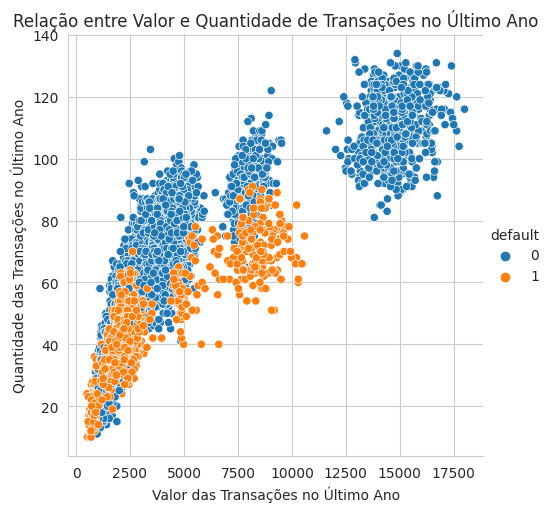

In [38]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

## 5\. Resumo dos insights 

* Entre os estados civis dos clientes ativos, os solteiros estão levementes mais elevados, quase se igualando ao número de clientes casados, quando comparado à distribuição para todos os clientes e clientes adimplentes.

* O número de transações dos clientes inadimplentes se concentram em torno de 40 transações em um período de 12 meses.

* O valor total das transações dos clientes inadimplentes se concentram em torno de 2300 em um período de 12 meses.

* Os clientes que transacionam valores acima de 11000 possuem menos chances de se tornarem inadimplentes, visto todas as transações acima desse valor foram de clientes adimplentes.

* Os clientes inadimplentes realizam menos transações e em valores menores em um período de 12 meses, que os clientes adimplentes.

____